In [1]:
import pandas as pd

In [2]:
#importing identified aca posts
posts = pd.read_csv('../data/processed/aca_posts.csv')

posts.head()

,Unnamed: 0,Unnamed: 0.1,selftext,title,time_created,processed_text,processed_title
0,15,15,Hey all. I'm currently under a contract/am tem...,Just missed open enrollment but I'll be changi...,2020-11-19 08:09:29,hey i'm currently contract/am temp-to-hire wor...,missed open enrollment i'll changing companies...
1,21,22,"They are relatives, they live in my household,...",Can I get insurance thru marketplace for child...,2020-11-19 00:09:29,relatives live household i've covering expense...,get insurance thru marketplace children unoffi...
2,23,24,My mom (58 y.o.) works as a nanny/housekeeper ...,"Can’t afford marketplace insurance, advice?",2020-11-18 23:00:48,mom (58 yo) works nanny/housekeeper family boo...,can’t afford marketplace insurance advice
3,26,28,This is the first time I've had the money (or ...,Special Enrollment insurance question for myse...,2020-11-18 22:09:19,first time i've money (or ability) get health ...,special enrollment insurance question &amp spouse
4,27,29,Got laid off early this year. At the time I th...,How To Back Date ACA Tax Credit?,2020-11-18 22:02:56,got laid early year time thought i'd find job ...,back date aca tax credit


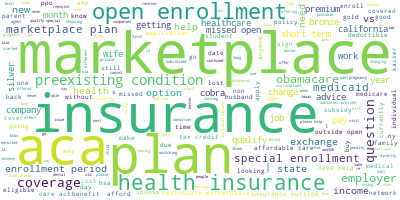

In [3]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

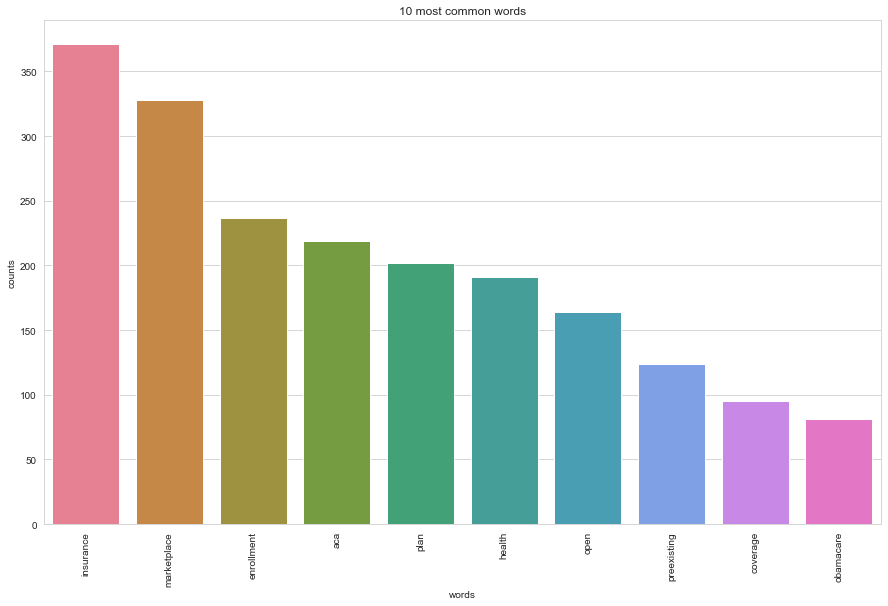

In [5]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Tweak the two parameters below
number_words = 10

topics = [3, 5, 10, 20, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('/n')